In [1]:
import os
import sys

work_dir = os.getenv("WORK_DIR")

sys.path.append(work_dir)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import joblib


In [3]:
dfs = {}
for year in range(2015,2020):
    df = pd.read_csv(f"../data/{year}.csv")
    dfs[year] = df



In [4]:
for year, data in dfs.items():
    print(f"year: {year}")
    print("Columns:", list(data.columns))
    print() 


year: 2015
Columns: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

year: 2016
Columns: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

year: 2017
Columns: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

year: 2018
Columns: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

year: 2019
Columns: ['

In [5]:
dfs[2015].drop(columns=['Standard Error'], inplace=True)

dfs[2016].drop(columns=['Upper Confidence Interval', 'Lower Confidence Interval'], inplace=True)

dfs[2017].drop(columns=['Whisker.high', 'Whisker.low'], inplace=True)


In [6]:
country_region_dict = dict(zip(dfs[2015]['Country'], dfs[2015]['Region']))

dfs[2017]['Region'] = dfs[2017]['Country'].map(country_region_dict)
dfs[2018]['Region'] = dfs[2018]['Country or region'].map(country_region_dict)
dfs[2019]['Region'] = dfs[2019]['Country or region'].map(country_region_dict)


In [7]:
dfs[2015].drop(columns=['Happiness Rank'], inplace=True)
dfs[2016].drop(columns=['Happiness Rank'], inplace=True)
dfs[2017].drop(columns=['Happiness.Rank'], inplace=True)
dfs[2018].drop(columns=['Overall rank'], inplace=True)
dfs[2019].drop(columns=['Overall rank'], inplace=True)


In [8]:

dfs[2017].rename(columns={
    'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
    'Health..Life.Expectancy.': 'Health (Life Expectancy)',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)',
    'Dystopia.Residual': 'Dystopia Residual'
}, inplace=True)

dfs[2018].rename(columns={
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'Economy (GDP per Capita)',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust (Government Corruption)'
}, inplace=True)

dfs[2019].rename(columns={
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'Economy (GDP per Capita)',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust (Government Corruption)'
}, inplace=True)



In [9]:

years = [2015, 2016, 2017, 2018, 2019]


dfs_combined = []

for year in years:
   
    df_with_year = dfs[year].copy()  
    df_with_year['year'] = year  
    dfs_combined.append(df_with_year)  


df = pd.concat(dfs_combined, ignore_index=True)


df.head()  

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [10]:
def statistic_count(num):

    statistic = num.describe().T
    statistic['median'] = num.median()
    statistic = statistic.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(statistic)

In [11]:
numerical = df.select_dtypes('number')

statistic_count(numerical)

,count,mean,median,std,min,25%,50%,75%,max
Happiness Score,782.0,5.379018,5.322000,1.127456,2.69300,4.509750,5.322000,6.189500,7.769000
Economy (GDP per Capita),782.0,0.916047,0.982205,0.407340,0.00000,0.606500,0.982205,1.236187,2.096000
Family,782.0,1.078392,1.124735,0.329548,0.00000,0.869363,1.124735,1.327250,1.644000
Health (Life Expectancy),782.0,0.612416,0.647310,0.248309,0.00000,0.440183,0.647310,0.808000,1.141000
Freedom,782.0,0.411091,0.431000,0.152880,0.00000,0.309768,0.431000,0.531000,0.724000
Trust (Government Corruption),781.0,0.125436,0.091000,0.105816,0.00000,0.054000,0.091000,0.156030,0.551910
Generosity,782.0,0.218576,0.201982,0.122321,0.00000,0.130000,0.201982,0.278832,0.838075
Dystopia Residual,470.0,2.092717,2.094640,0.565772,0.32858,1.737975,2.094640,2.455575,3.837720
year,782.0,2016.993606,2017.000000,1.417364,2015.00000,2016.000000,2017.000000,2018.000000,2019.000000


In [12]:
summary = pd.DataFrame({
    'dtypes': df.dtypes,
    'null count': df.isnull().sum(),
    'duplicate count': df.duplicated().sum(),
    'unique values': df.nunique()
})
summary

,dtypes,null count,duplicate count,unique values
Country,object,0,0,170
Region,object,19,0,10
Happiness Score,float64,0,0,716
Economy (GDP per Capita),float64,0,0,742
Family,float64,0,0,732
Health (Life Expectancy),float64,0,0,705
Freedom,float64,0,0,697
Trust (Government Corruption),float64,1,0,635
Generosity,float64,0,0,664
Dystopia Residual,float64,312,0,470


In [13]:
region_mapping = {
    'Taiwan Province of China': 'Eastern Asia',
    'Belize': 'Latin America and Caribbean',
    'Hong Kong S.A.R., China': 'Eastern Asia',
    'Somalia': 'Sub-Saharan Africa',
    'Namibia': 'Sub-Saharan Africa',
    'South Sudan': 'Sub-Saharan Africa',
    'United Arab Emirates': 'Middle East and Northern Africa',
    'Trinidad & Tobago': 'Latin America and Caribbean',
    'Northern Cyprus': 'Eastern Europe',
    'North Macedonia': 'Central and Eastern Europe',
    'Gambia': 'Sub-Saharan Africa'
}

df['Region'] = df['Region'].fillna(df['Country'].map(region_mapping))

In [14]:
normalization_regions = {
    'Western Europe': 'Europe',
    'North America': 'America',
    'Australia and New Zealand': 'Oceania',
    'Middle East and Northern Africa': 'Africa',
    'Latin America and Caribbean': 'America',
    'Southeastern Asia': 'Asia',
    'Central and Eastern Europe': 'Europe',
    'Eastern Asia': 'Asia',
    'Sub-Saharan Africa': 'Africa',
    'Southern Asia': 'Asia',
    'Eastern Europe': 'Europe'
}

# Normalize the regions using the mapping
df['Region'] = df['Region'].map(normalization_regions)


In [15]:
df['Trust (Government Corruption)'] = df['Trust (Government Corruption)'].fillna(method='ffill')

C:\Users\jhona\AppData\Local\Temp\ipykernel_12416\1782586904.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Trust (Government Corruption)'] = df['Trust (Government Corruption)'].fillna(method='ffill')


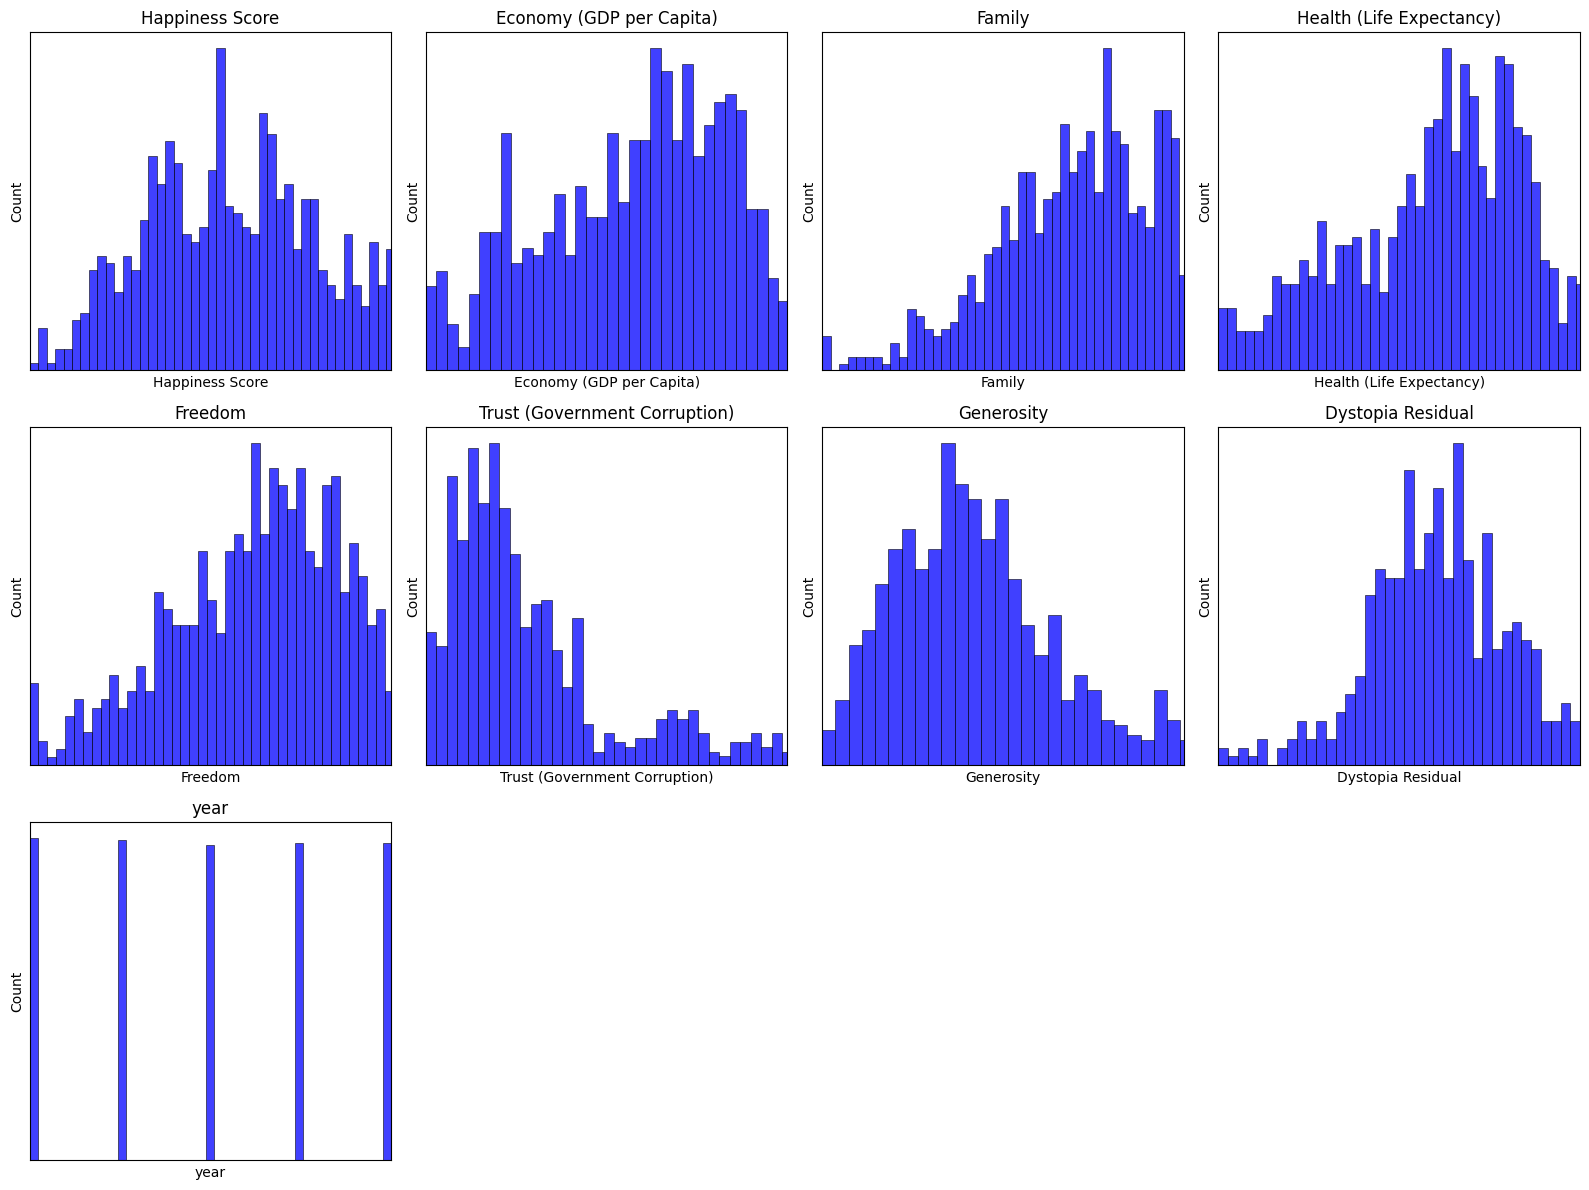

In [16]:
from math import ceil

numerical = df.select_dtypes('number')

n_cols = 4
n_rows = ceil(numerical.shape[1] / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 4, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(numerical.columns):
    sns.histplot(numerical[column], bins=45, ax=axes[i], color='blue', kde=False)
    axes[i].set_title(column)
    axes[i].set_yticks([])  
    axes[i].set_xticks([])  

    axes[i].set_xlim([numerical[column].min(), numerical[column].quantile(0.98)])

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

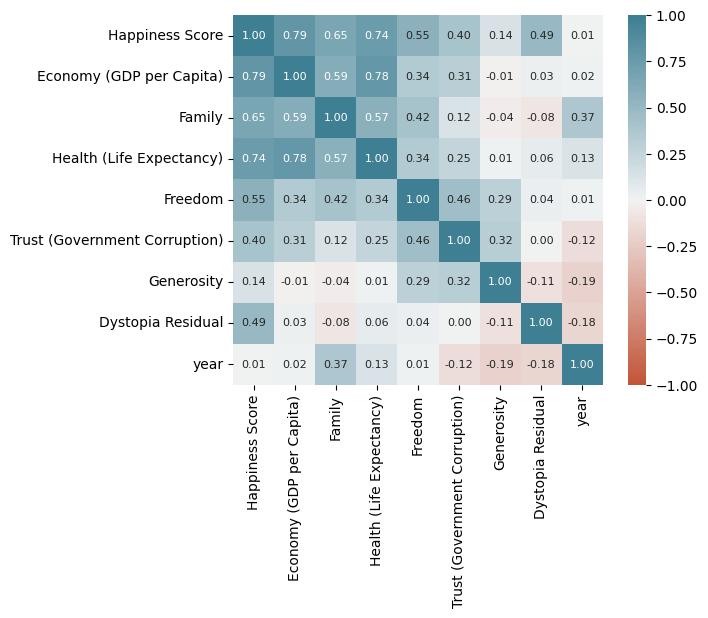

In [17]:
correlation = numerical.corr()
ax = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 8}
)

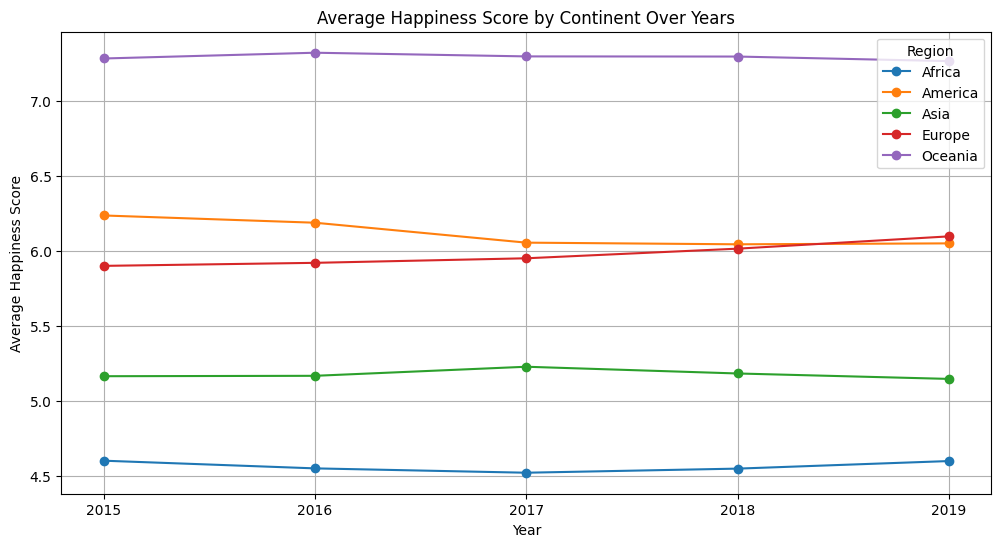

In [18]:
average_per_continent = df.groupby(['year', 'Region'])['Happiness Score'].mean().reset_index()

plt.figure(figsize=(12, 6))
for region in average_per_continent['Region'].unique():
    subset = average_per_continent[average_per_continent['Region'] == region]
    plt.plot(subset['year'], subset['Happiness Score'], marker='o', label=region)

plt.title('Average Happiness Score by Continent Over Years')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.legend(title='Region')
plt.grid()
plt.xticks(subset['year'].unique())  # Asegura que se muestren todos los años
plt.show()


In [19]:
df.rename(columns={
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'Economy',
    'Health (Life Expectancy)': 'Health',
    'Trust (Government Corruption)': 'Trust',
    'Dystopia Residual' : 'Dystopia'
}, inplace=True)


## Feature Selection

In [20]:
df = pd.get_dummies(df, columns=['Region'], drop_first=True, dtype=int)
df.drop(columns="Country", inplace=True)


In [21]:
from sklearn.linear_model import LinearRegression

complete_data = df.dropna(subset=['Dystopia'])
incomplete_data = df[df['Dystopia'].isna()]

predictors = [
    'Economy', 
    'Family', 
    'Health', 
    'Freedom', 
    'Trust', 
    'Generosity', 
    'year', 
    'Region_America', 
    'Region_Asia', 
    'Region_Europe', 
    'Region_Oceania'
]

X_train = complete_data[predictors]
y_train = complete_data['Dystopia']

model = LinearRegression()
model.fit(X_train, y_train)

X_missing = incomplete_data[predictors]
predicted_values = model.predict(X_missing)

df.loc[df['Dystopia'].isna(), 'Dystopia'] = predicted_values


### Aprendizaje supervisado

In [22]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

X = df.drop(['Score'], axis=1)
y = df['Score']
# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [23]:
# Importar las librerías necesarias para modelos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


In [24]:
model_LR = LinearRegression()
model_Ridge = Ridge(random_state=0)
model_Lasso = Lasso(random_state=0)
model_DT = DecisionTreeRegressor(random_state=0)
model_RF = RandomForestRegressor(random_state=0)
model_GB = GradientBoostingRegressor(random_state=0)
model_AB = AdaBoostRegressor(random_state=0)
model_SVR = SVR()
model_KNN = KNeighborsRegressor()
model_XGB = XGBRegressor(random_state=0)

In [25]:
model_LR.fit(X_train, y_train)
model_Ridge.fit(X_train, y_train)
model_Lasso.fit(X_train, y_train)
model_DT.fit(X_train, y_train)
model_RF.fit(X_train, y_train)
model_GB.fit(X_train, y_train)
model_AB.fit(X_train, y_train)
model_SVR.fit(X_train, y_train)
model_KNN.fit(X_train, y_train)
model_XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [26]:
from sklearn.metrics import r2_score, mean_squared_error


In [27]:
y_pred_LR = model_LR.predict(X_test)
y_pred_Ridge = model_Ridge.predict(X_test)
y_pred_Lasso = model_Lasso.predict(X_test)
y_pred_DT = model_DT.predict(X_test)
y_pred_RF = model_RF.predict(X_test)
y_pred_GB = model_GB.predict(X_test)
y_pred_AB = model_AB.predict(X_test)
y_pred_SVR = model_SVR.predict(X_test)
y_pred_KNN = model_KNN.predict(X_test)
y_pred_XGB = model_XGB.predict(X_test)

print("Linear Regression, R^2: ", r2_score(y_test, y_pred_LR))
print("Ridge, R^2: ", r2_score(y_test, y_pred_Ridge))
print("Decision Tree, R^2: ", r2_score(y_test, y_pred_DT))
print("Random Forest, R^2: ", r2_score(y_test, y_pred_RF))
print("Gradient Boosting, R^2: ", r2_score(y_test, y_pred_GB))
print("AdaBoost, R^2: ", r2_score(y_test, y_pred_AB))
print("KNN, R^2: ", r2_score(y_test, y_pred_KNN))
print("XGBoost, R^2: ", r2_score(y_test, y_pred_XGB))



Linear Regression, R^2:  0.9163196055846765
Ridge, R^2:  0.9163915597920823
Decision Tree, R^2:  0.7518428969508433
Random Forest, R^2:  0.8883419978567023
Gradient Boosting, R^2:  0.9006454116464917
AdaBoost, R^2:  0.8262274217696987
KNN, R^2:  0.825851428479348
XGBoost, R^2:  0.8769068571547046


In [28]:




formula = 'Score ~ Economy + Family + np.power(Family, 2) + Health + np.power(Health, 2) + Freedom + np.power(Freedom, 2) + Trust + bs(Trust, df=6, degree=2) + Generosity + np.power(Generosity, 2) + Dystopia  + Region_America + Region_Asia + Region_Europe + Region_Oceania'

train_df = pd.concat([y_train.reset_index(drop=True), X_train.reset_index(drop=True)], axis=1)



model_poly = smf.ols(formula=formula, data=train_df)
result_poly = model_poly.fit()

predicted = result_poly.predict(X_test)


print(r2_score(y_test, predicted))


0.9205143656615372


Model conclusions:

Best Model -> Lineal Model

Best r^2 -> 0.92


This model explain the 92% of the variance of the happiness score.

In [29]:
joblib.dump(result_poly, '../model_training/polymodel.pkl')

['../model_training/polymodel.pkl']